In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import datetime
import psutil
import math
import seaborn as sns
from datetime import timedelta, datetime, tzinfo, timezone, time

In [5]:
def show_data():
    train_folder = [7554,7556,7557,7558]#,7559,7560,7561,7563,7569,7570,7571,7572,7573,7574]
    for j in train_folder:
        for i in range(3,20,8):
            url = r"train/"+str(j)+"/SimpleTest/"+str(i)+".csv"
            data = pd.read_csv(url)
            #print(data.info())
            data.columns = data.columns.str.replace(' ', '')
            submit_time = data.iloc[-1][0]
            start_time = data.iloc[-2][0]
            data.dropna(inplace=True)
            data['Time'] = pd.to_datetime(data['Time'],format="%M:%S.%f").dt.time
            data['X'] = data.X.astype(float)

            x = data.X.tolist()
            y = data.Y.tolist()

            fig=plt.figure(figsize=(5,3))
            ax=fig.add_subplot(111)

            plt.gca().invert_yaxis()
            ax.scatter(x,y,s=1,c='red')
            ax.set_xbound(lower=0.0, upper=1381)
            ax.set_ybound(lower=0.0, upper=925)

            plt.tight_layout()
            plt.show()

In [43]:
data = pd.read_csv(r'train/7556/SimpleTest/18.csv')

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          656 non-null    object 
 1    Y         654 non-null    float64
 2    Pressure  654 non-null    float64
 3    TiltX     654 non-null    float64
 4    TiltY     654 non-null    float64
 5    Time      654 non-null    object 
dtypes: float64(4), object(2)
memory usage: 30.9+ KB


In [45]:
#remove the extra spaces in the columns.
print(data.columns)
data.columns = data.columns.str.replace(' ', '')
data.head(3)

Index(['X', ' Y', ' Pressure', ' TiltX', ' TiltY', ' Time'], dtype='object')


,X,Y,Pressure,TiltX,TiltY,Time
0,462.68807021596,574.910729,0.061021,-4188.0,2837.0,00:04.0815236
1,443.203141240328,570.908419,0.013901,-3206.0,2262.0,00:04.1752651
2,443.203141240328,570.908419,0.013901,-3206.0,2262.0,00:04.1929372


In [46]:
submit_time = data.iloc[-1][0]
start_time = data.iloc[-2][0]
data.dropna(inplace=True)

print(start_time)
print(submit_time)

Time Elapsed till drawing started: 00:04.0815236
Time Elapsed till drawing submit: 00:24.6440379


In [47]:
data['X'] = data.X.astype(float)

In [48]:
# change the Time column to float
data.Time = data.Time.str.replace("00:","").astype(np.float64)

In [49]:
data.head(3)

,X,Y,Pressure,TiltX,TiltY,Time
0,462.688070,574.910729,0.061021,-4188.0,2837.0,4.081524
1,443.203141,570.908419,0.013901,-3206.0,2262.0,4.175265
2,443.203141,570.908419,0.013901,-3206.0,2262.0,4.192937


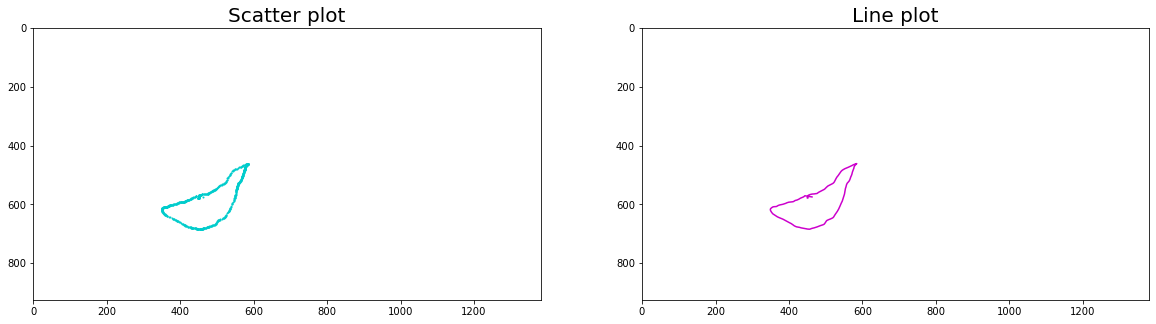

In [98]:
fig=plt.figure(figsize=(20,5))
ax= fig.add_subplot(1, 2, 1)

plt.gca().invert_yaxis()
ax.scatter(data.X,data.Y,s=1,c='#00CCCC')
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)
ax.set_title("Scatter plot",fontdict={'fontsize': 20})

ax2 = fig.add_subplot(1, 2, 2)
plt.gca().invert_yaxis()
ax2.plot(data.X,data.Y,"#CC00CC")
ax2.set_xbound(lower=0.0, upper=1381)
ax2.set_ybound(lower=0.0, upper=925)
ax2.set_title("Line plot",fontdict={'fontsize': 20})

plt.show()

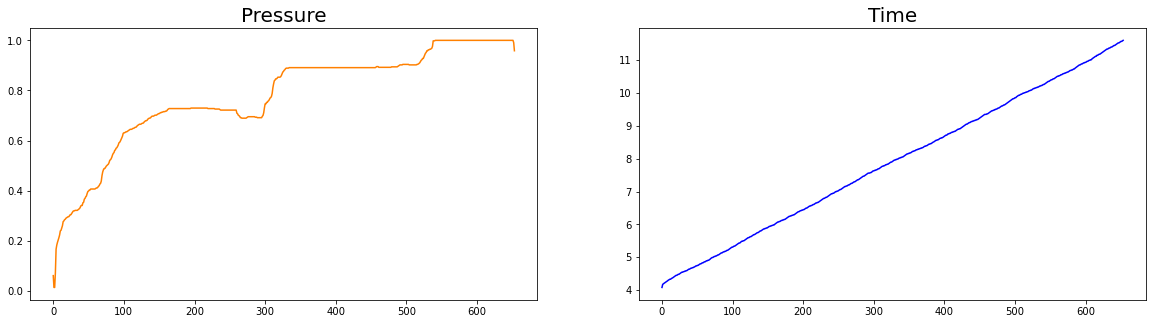

In [99]:
fig=plt.figure(figsize=(20,5))

ax= fig.add_subplot(1, 2, 1)
ax.plot(data.Pressure,"#FF8000")
ax.set_title("Pressure",fontdict={'fontsize': 20})

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(data.Time,c='b')
ax2.set_title("Time",fontdict={'fontsize': 20})

plt.show()

## *Hand lifts:*

In [53]:
hand_lifts = 0
rolling_std = data.Time.rolling(window=20).std()

for i in range(len(data.Time)-1):
    if (data.Time[i+1] > data.Time[i] + rolling_std[i]):
        hand_lifts +=1
        
print("Number of hand lifts: " + str(hand_lifts))

Number of hand lifts: 0


<IPython.core.display.Javascript object>


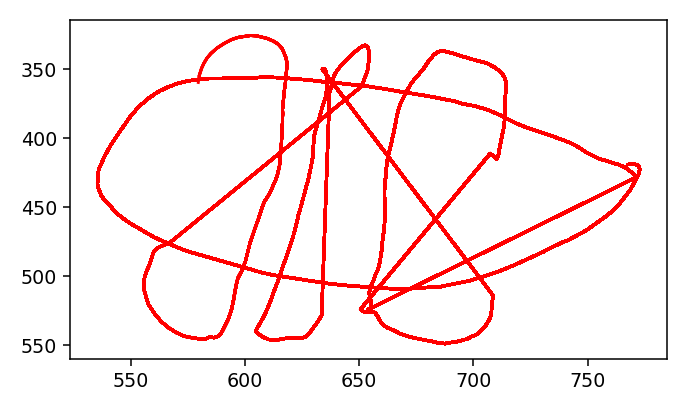

In [122]:
import psutil
%matplotlib notebook

plt.rcParams['animation.html'] = 'jshtml'

fig = plt.figure(figsize=(5,3),dpi=100)
ax = fig.add_subplot(111)
plt.gca().invert_yaxis()
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)
plt.tight_layout()
plt.show()


In [123]:
c=[]
d=[]
for i in range (len(data.X)):
    c.append(data.X[i])
    d.append(data.Y[i])
    plt.tight_layout()
    ax.plot(c,d , color='r')
    fig.canvas.draw() 
plt.close()
